In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pandas as pd
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler, normalize
import seaborn as sns
from skbio.stats.composition import clr
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/libraries/')
from clinical import load_clinical
from data_processing import *

In [2]:
adata = ad.read_h5ad('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/bioclavis/00_data/2410_Bioclavis_filtered_negative_with_annotations.h5ad')

In [3]:
clinpath, survival, patterns_samples = load_clinical()
core_areas = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/bioclavis/00_data/processed_core_areas.csv')
adata.obs = match_cores_to_samples(adata.obs, col_to_map='core', recipient_col='samples')

In [ ]:
leiden_clusters, malignant_clusters, stromal_clusters = load_topography()
all_abnormal = sorted(list(malignant_clusters) + list(stromal_clusters))

In [5]:
# pure_cores_counts = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/bioclavis/00_data/pure_cores_densities_with_annotations_all.csv', index_col=0)


pure_cores_counts = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/bioclavis/00_data/pure_cores_densities_with_annotations.csv', index_col=0)

adata_df = adata.obs.copy(deep=True)
adata_df = adata_df[adata_df['core'].isin(pure_cores_counts['core'])]
adata_df

,TMA,core,compartment,CellX,CellY,leiden_0.2,leiden_0.3,leiden_0.5,cell_lineage,ki67_positive,CellX_norm,CellY_norm,tiles,samples,leiden_2.5
0,22,22-05-J,Tumour,8526.375294,-47209.294961,14,15,12,CKPAN+,0,0.173370,0.882575,1_1.jpeg,ACA_1067,46.0
1,22,22-05-J,Tumour,8502.780534,-47222.466136,14,7,27,CKPAN+,0,0.153310,0.870625,1_1.jpeg,ACA_1067,46.0
2,22,22-05-J,Tumour,8510.929662,-47224.074935,14,7,19,CKPAN+,1,0.160238,0.869166,1_1.jpeg,ACA_1067,46.0
3,22,22-05-J,Tumour,8517.623256,-47224.496313,14,15,8,SMA+,0,0.165929,0.868783,1_1.jpeg,ACA_1067,46.0
4,22,22-05-J,Stroma,8522.685445,-47229.076912,4,4,1,CKPAN+,0,0.170233,0.864628,1_1.jpeg,ACA_1067,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193671,7,07-02-E,Stroma,16662.507831,-61368.284781,8,13,34,CKPAN+,0,0.812154,0.133889,0_0.jpeg,ACA_0411,13.0
13193672,7,07-02-E,Stroma,16629.507339,-61369.369176,1,22,14,CD8+,0,0.783851,0.132901,0_0.jpeg,ACA_0411,13.0
13193673,7,07-02-E,Stroma,16588.451347,-61369.921865,2,1,10,CD8+,0,0.748640,0.132398,0_0.jpeg,ACA_0411,13.0
13193674,7,07-02-E,Stroma,16574.006478,-61368.974251,13,16,18,CD4+,0,0.736252,0.133261,0_0.jpeg,ACA_0411,13.0


## Cell densities per cluster

In [6]:
pure_cores_counts.columns = [c.split("_")[0] if c.endswith('mm2') else c for c in pure_cores_counts.columns]
pure_cores_counts.rename(columns={'cluster':'HPC'}, inplace=True)
# pure_cores_counts['HPC'] = pure_cores_counts['HPC'].apply(lambda x: f'HPC {x.split("_")[1]}')
pure_cores_counts

,core,CKPAN,SMA,Negative,CD4,CD68,CD8,HPC
0,01-02-B,2045.174368,910.768869,2104.270058,1354.565913,375.431442,1023.166553,HPC 64
1,01-02-E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,HPC 24
2,01-02-K,667.502252,1491.531195,1972.753748,226.381578,166.875563,1648.057885,HPC 8
3,01-04-A,2526.258428,1465.999908,1634.812019,709.307026,616.016123,279.872710,HPC 21
4,01-04-K,247.225634,1504.367983,1452.450599,231.155968,173.057944,1351.088089,HPC 6
...,...,...,...,...,...,...,...,...
722,20-15-E,2015.291674,835.049075,3679.403809,2897.231199,596.606149,519.785625,HPC 48
723,21-14-H,1101.234620,1157.128817,1455.627618,1058.422043,331.797472,480.452253,HPC 64
724,22-02-C,943.884921,2978.741062,1406.573608,1021.811437,702.312723,393.528904,HPC 27
725,22-02-F,2680.154544,434.594504,2093.870738,1536.435817,799.393317,544.406392,HPC 11


In [7]:
pure_cores_counts['HPC'].value_counts()

HPC 52    73
HPC 11    48
HPC 46    42
HPC 64    38
HPC 48    37
HPC 44    36
HPC 67    33
HPC 50    30
HPC 0     28
HPC 68    25
HPC 41    23
HPC 35    22
HPC 17    22
HPC 28    20
HPC 30    20
HPC 13    19
HPC 27    18
HPC 21    15
HPC 34    15
HPC 31    14
HPC 69    14
HPC 47    13
HPC 54    13
HPC 40     9
HPC 56     8
HPC 61     8
HPC 33     8
HPC 5      6
HPC 16     6
HPC 58     5
HPC 15     4
HPC 32     4
HPC 2      3
HPC 12     3
HPC 1      3
HPC 70     3
HPC 22     3
HPC 6      3
HPC 43     3
HPC 37     3
HPC 60     3
HPC 45     2
HPC 53     2
HPC 8      2
HPC 38     2
HPC 10     2
HPC 24     2
HPC 66     2
HPC 55     2
HPC 62     2
HPC 57     2
HPC 59     1
HPC 65     1
HPC 25     1
HPC 51     1
Name: HPC, dtype: int64

### All cores coloured by HPC

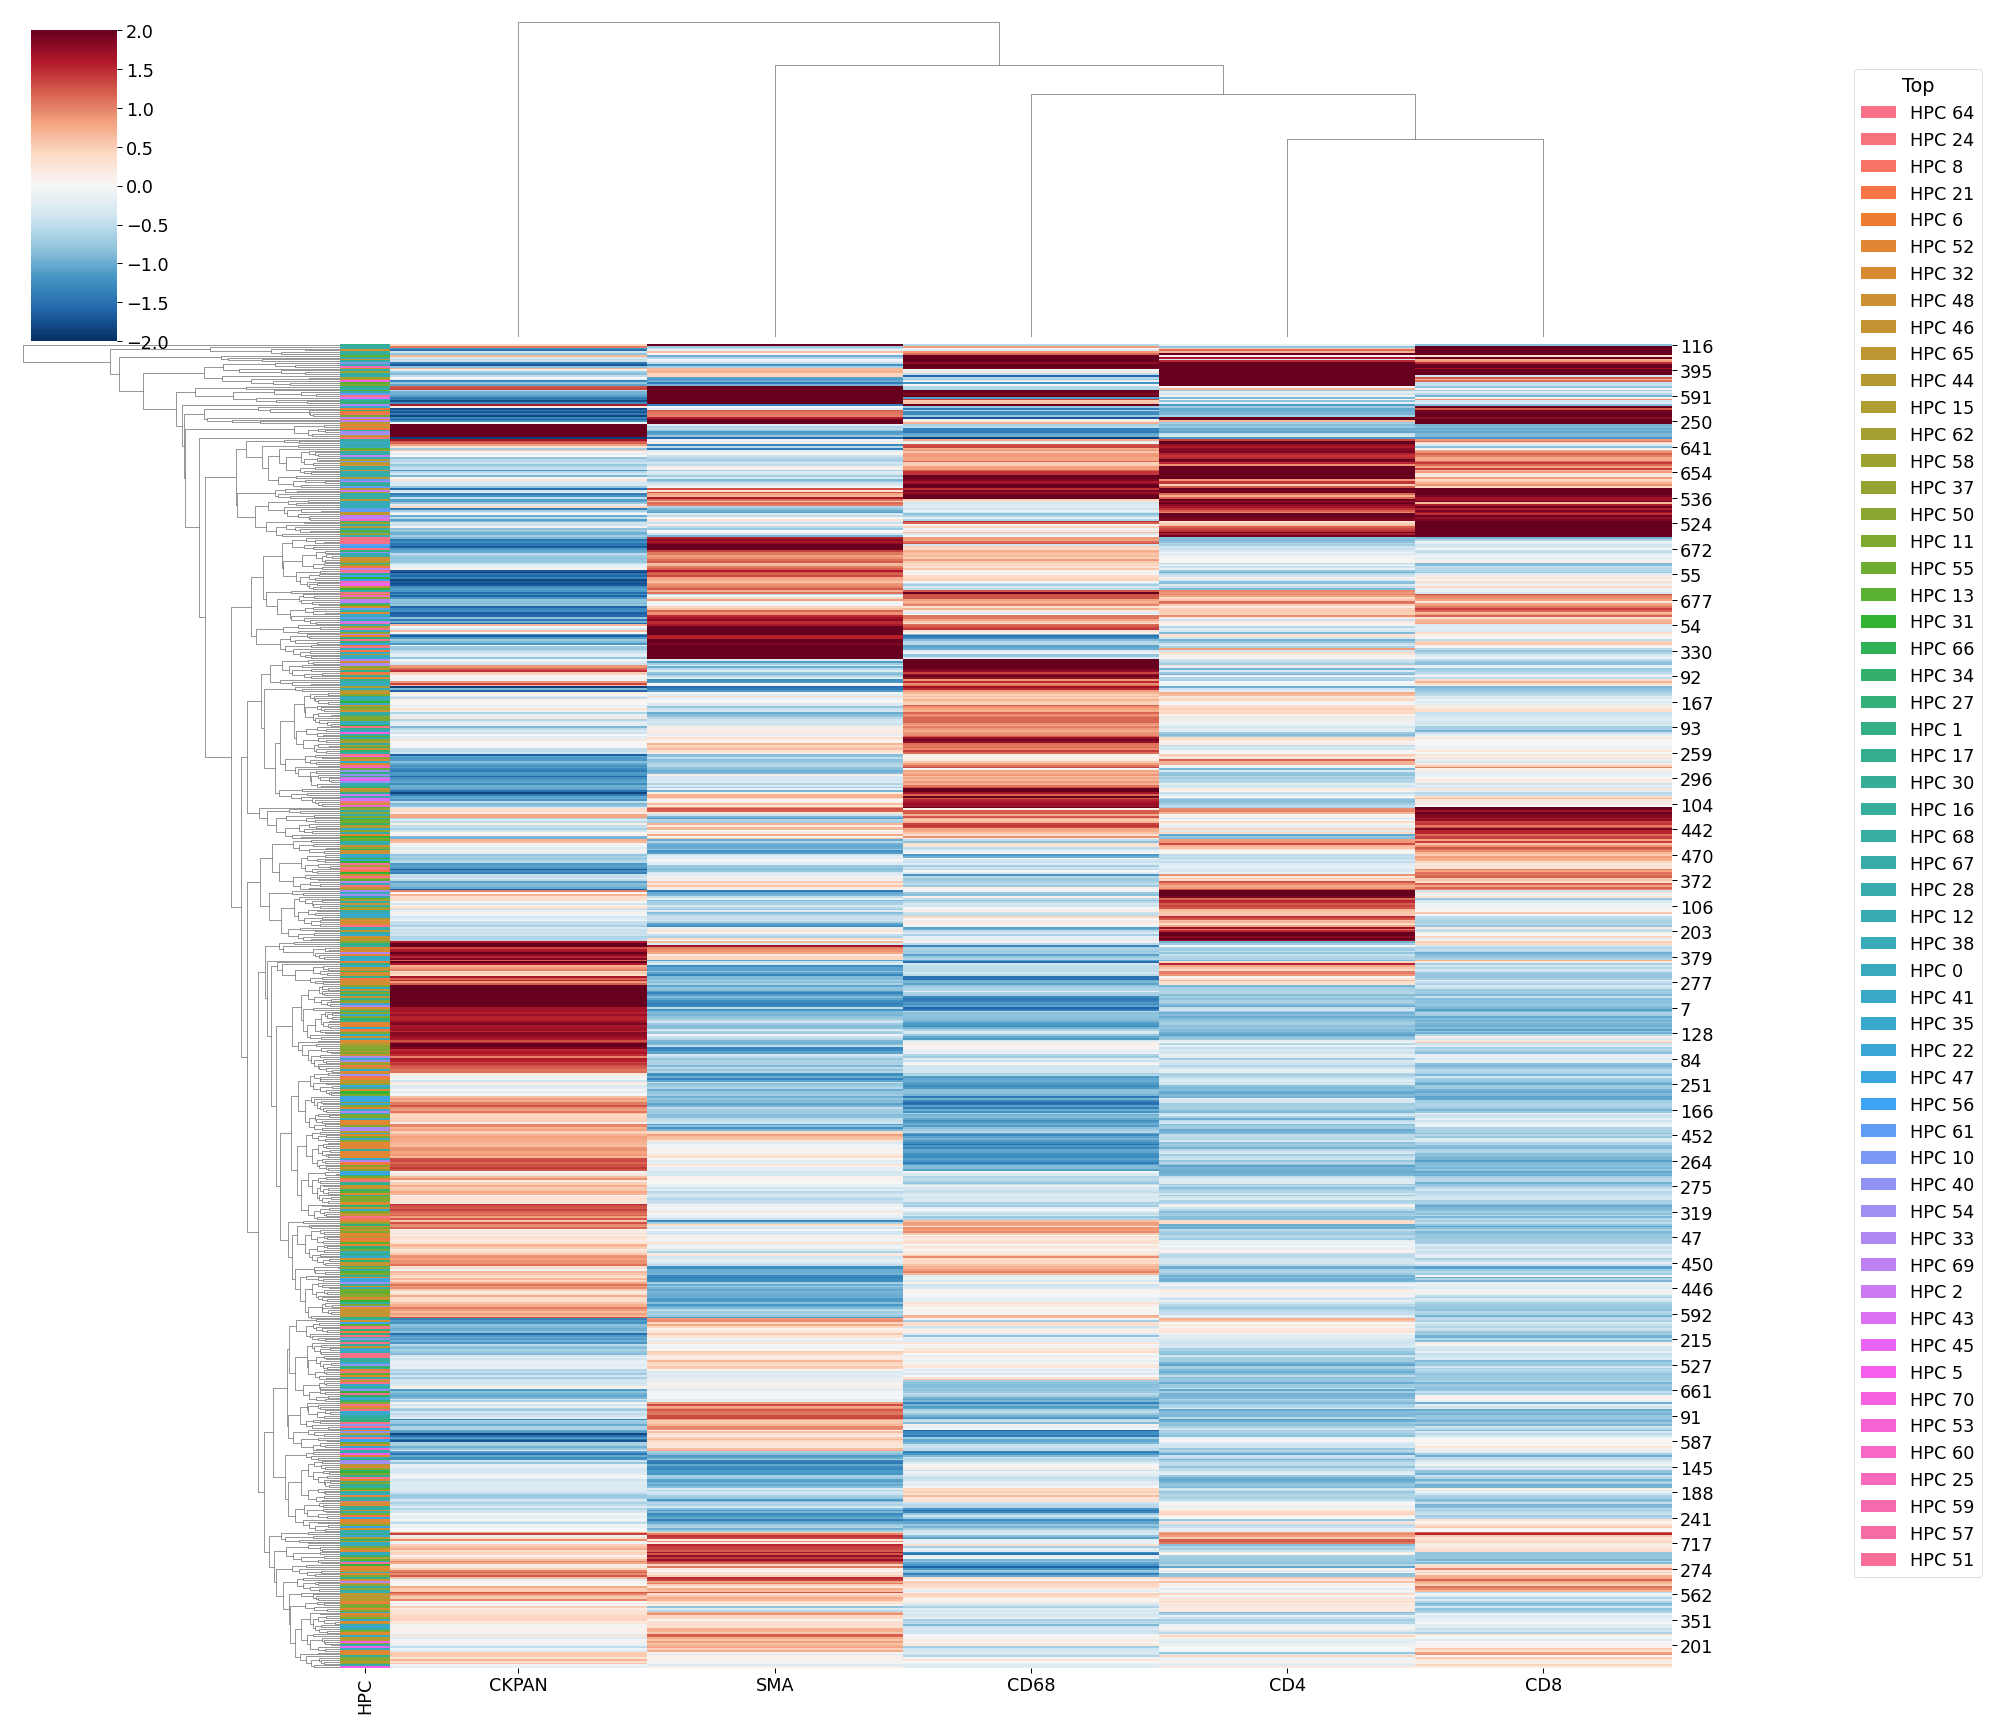

In [8]:
from matplotlib.patches import Patch
sns.set_context("paper", font_scale=2.0)

color_palette = sns.husl_palette(len(pure_cores_counts['HPC'].unique()))
palette_dict = dict(zip(pure_cores_counts['HPC'].unique(), color_palette))
row_colors = pure_cores_counts['HPC'].astype(str).map(palette_dict)

sns.clustermap(pure_cores_counts[['CKPAN', 'SMA', 'CD4', 'CD68', 'CD8']], z_score=1, cmap='RdBu_r', vmin=-2, vmax=2, row_colors=row_colors, figsize=(24,24))
legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in palette_dict.items()]
plt.legend(handles=legend_elements_1, title='Top', loc='lower left', bbox_to_anchor=[21.0, -4.0, 1.0, 0.0])

In [ ]:
# Filter down to malignant HPCs onlt
malignant_pure_cores_counts = pure_cores_counts[pure_cores_counts['HPC'].isin([f'HPC {c}' for c in list(malignant_clusters)+[10,16]])]

# Additionally do not consider non-invasive patterns in this classification
noninvasive = ['HPC 35', 'HPC 41', 'HPC 46', 'HPC 54', 'HPC 52']
malignant_pure_cores_counts = malignant_pure_cores_counts[~malignant_pure_cores_counts['HPC'].isin(noninvasive)]

# Only n=2 for HPC 10 so remove this one
malignant_pure_cores_counts = malignant_pure_cores_counts[malignant_pure_cores_counts['HPC'] != 'HPC 10']

malignant_pure_cores_counts['lym'] = malignant_pure_cores_counts['CD4'] + malignant_pure_cores_counts['CD8']

for col in ['CKPAN', 'SMA', 'CD4', 'CD68', 'CD8', 'lym']:
    malignant_pure_cores_counts[col] = np.log10(malignant_pure_cores_counts[col])

malignant_pure_cores_counts

,core,CKPAN,SMA,Negative,CD4,CD68,CD8,HPC,lym
0,01-02-B,3.310730,2.959408,2104.270058,3.131800,2.574531,3.009946,HPC 64,3.376163
3,01-04-A,3.402478,3.166134,1634.812019,2.850834,2.789592,2.446961,HPC 21,2.995275
10,01-07-G,3.442697,2.514763,1202.571829,3.011683,2.533617,2.715348,HPC 48,3.189345
16,01-11-K,3.329949,2.805419,1673.255915,3.424048,2.829553,3.047866,HPC 44,3.576505
17,01-12-A,3.546382,2.622321,1493.954240,2.601189,2.967444,2.423893,HPC 21,2.822556
...,...,...,...,...,...,...,...,...,...
722,20-15-E,3.304338,2.921712,3679.403809,3.461983,2.775688,2.715824,HPC 48,3.533647
723,21-14-H,3.041880,3.063382,1455.627618,3.024659,2.520873,2.681650,HPC 64,3.187203
724,22-02-C,2.974919,3.474033,1406.573608,3.009371,2.846531,2.594977,HPC 27,3.150861
725,22-02-F,3.428160,2.638084,2093.870738,3.186514,2.902761,2.735923,HPC 11,3.318239


In [10]:
cluster_avg_densities = list()
samples_densities_norm_ = malignant_pure_cores_counts.copy(deep=True)
samples_densities_norm_ = samples_densities_norm_.drop(columns=['Negative'], axis=1)

for cluster in samples_densities_norm_['HPC'].unique():
    avg_values = list(samples_densities_norm_[samples_densities_norm_['HPC'] == cluster].median(numeric_only=True, axis=0).values)
    cluster_avg_densities.append(([cluster]+avg_values))

cluster_avg_df = pd.DataFrame(data=cluster_avg_densities, columns=[['HPC']+['CKPAN', 'SMA', 'CD4', 'CD68', 'CD8', 'lym']])
cluster_avg_df.columns = [c[0] for c in cluster_avg_df.columns.values] 

cluster_avg_df['hpc_num'] = cluster_avg_df['HPC'].apply(lambda x: int(x.split(" ")[1]))
cluster_avg_df = cluster_avg_df[cluster_avg_df['hpc_num'].isin(list(malignant_clusters)+list(stromal_clusters))]

cluster_avg_df = cluster_avg_df.set_index('HPC')
cluster_avg_df = cluster_avg_df.sort_index()
cluster_avg_df = cluster_avg_df.drop(labels=['hpc_num'], axis=1)

cluster_avg_df.sort_values(by='CKPAN')

# cluster_avg_df.index = [f"HPC {c.split('_')[1]}" for c in cluster_avg_df.index.values] 

,CKPAN,SMA,CD4,CD68,CD8,lym
HPC,,,,,,
HPC 40,3.056107,2.973997,2.714281,2.769660,2.435339,2.944880
HPC 5,3.083964,3.007735,2.940539,2.707236,2.725657,3.137639
HPC 16,3.119559,3.016854,3.271159,2.916385,3.294004,3.602642
HPC 27,3.120690,3.012635,2.625153,2.678300,2.490447,2.968499
HPC 61,3.164205,3.008024,3.260813,2.897898,2.835829,3.435851
HPC 64,3.195630,3.007047,2.849987,2.701054,2.494583,2.994808
HPC 69,3.202805,3.100559,3.370428,2.836554,2.925511,3.504096
HPC 28,3.224591,2.836164,3.403758,2.911226,3.056120,3.558568
HPC 48,3.314191,2.746339,3.173765,2.763989,2.762703,3.310600


### Overlay survival -- all HPCs

In [11]:
survival_ridge_df = load_hazard_ratios(which='all')
survival_ridge_df = survival_ridge_df[survival_ridge_df['covariate'].isin(cluster_avg_df.index)]
survival_ridge_df = survival_ridge_df.rename(columns={'covariate':'HPC'}).set_index('HPC')
survival_ridge_df = survival_ridge_df.sort_index()
survival_ridge_df


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p),se
HPC,,,,,,,,,,,
HPC 0,-4.844009e-02,0.952749,0.031415,-0.110150,0.013270,0.895883,1.013241,-1.536970,0.020767,3.036461,0.031485
HPC 11,-1.283005e-02,0.987327,0.017424,-0.056828,0.031168,0.954825,1.021724,-0.443929,0.901846,0.697720,0.022448
HPC 13,5.303606e-02,1.054499,0.034382,-0.014403,0.120475,0.985797,1.127998,1.550618,0.018144,3.095077,0.034409
HPC 16,-1.426224e-02,0.985934,0.035505,-0.092050,0.063525,0.920484,1.057328,-0.313945,0.977890,0.453253,0.039688
HPC 17,4.850562e-03,1.004875,0.017242,-0.038758,0.048459,0.971749,1.039918,0.170512,0.998723,0.225571,0.022250
HPC 21,1.202522e-02,1.012170,0.018818,-0.035565,0.059616,0.975668,1.050985,0.382028,0.945836,0.581871,0.024281
HPC 27,1.053409e-01,1.111162,0.041357,0.024177,0.186505,1.024681,1.204962,2.560712,0.000001,6.656536,0.041411
HPC 28,-1.878733e-08,1.000000,0.000054,-0.000107,0.000107,0.999895,1.000105,-0.000309,1.000000,0.000450,0.000054
HPC 30,4.132118e-02,1.042213,0.030016,-0.017564,0.100207,0.982680,1.105360,1.384061,0.050568,2.635884,0.030044


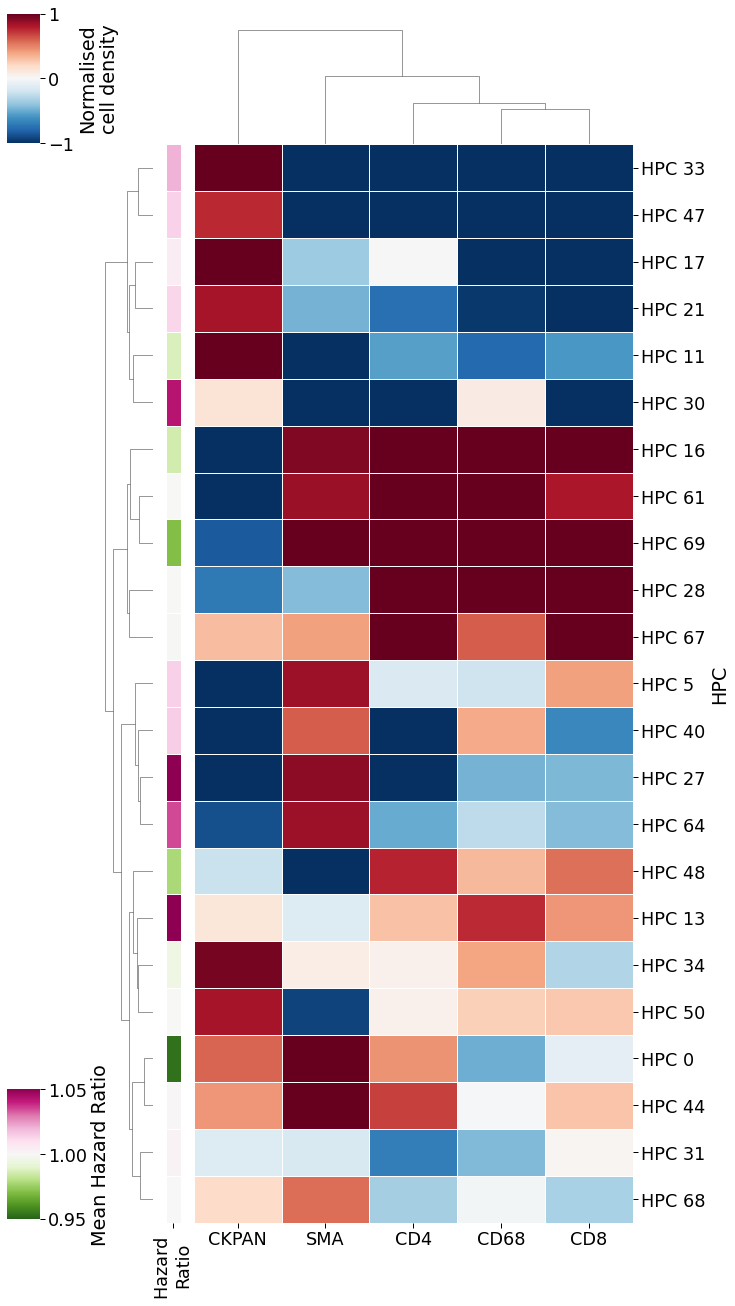

In [12]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, TwoSlopeNorm

vmin, vmax = survival_ridge_df['exp(coef)'].min(), survival_ridge_df['exp(coef)'].max()

# norm = Normalize(vmin=vmin, vmax=vmax)
norm = TwoSlopeNorm(vmin=0.95, vmax=1.05, vcenter=1)

cmap = plt.cm.PiYG_r
sm = ScalarMappable(norm=norm, cmap=cmap)
row_colors = pd.DataFrame(sm.to_rgba(survival_ridge_df['exp(coef)']), index=cluster_avg_df.index, columns=['R', 'G', 'B', 'A'])
row_colors = row_colors.apply(lambda x: tuple(x), axis=1)
row_colors.name = 'Hazard \nRatio'

g = sns.clustermap(cluster_avg_df.drop(labels='lym', axis=1), 
                   z_score=1, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.1, .1), 
                   cbar_pos=(-0.13, 0.9, 0.05, 0.1), 
                   cbar_kws={'label':'Normalised\ncell density'},
                   row_colors=row_colors,
                   figsize=(9,18))

cbar_ax = g.fig.add_axes([-0.13, 0.07, 0.05, 0.1])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean Hazard Ratio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels());

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/heatmap_densities_all_clsuters_hazard_ratio.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [ ]:
cluster_avg_df_t = cluster_avg_df.T
survival_ridge_df_t = survival_ridge_df.T

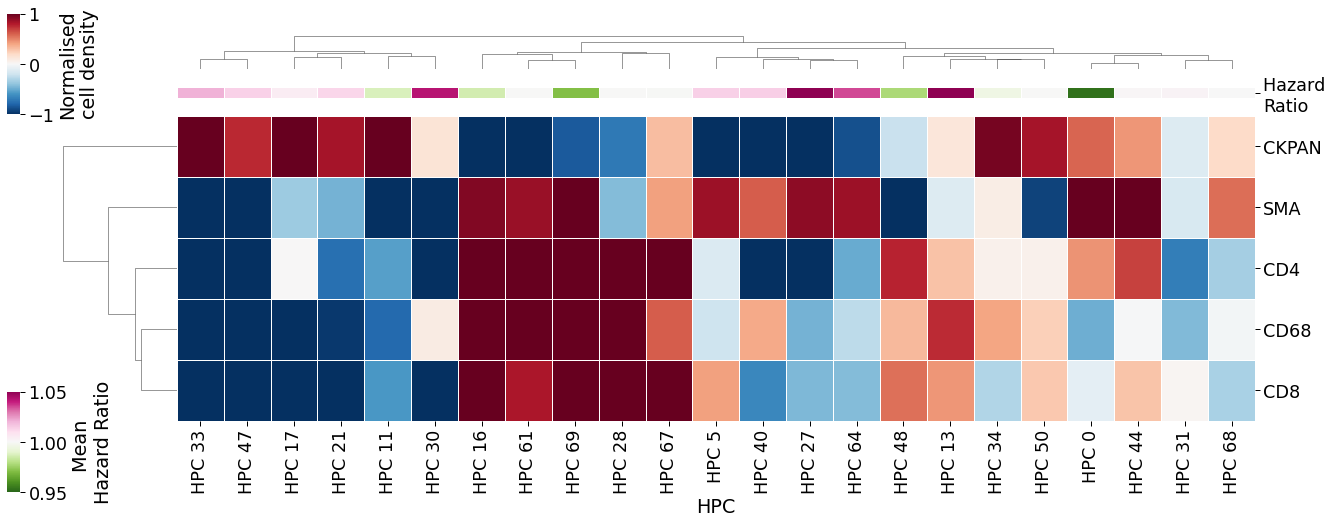

In [14]:
# vmin, vmax = survival_ridge_df_t['exp(coef)'].min(), survival_ridge_df_t['exp(coef)'].max()

# norm = Normalize(vmin=vmin, vmax=vmax)
# norm = TwoSlopeNorm(vmin=0.95, vmax=1.05, vcenter=1)

# cmap = plt.cm.PiYG_r
# sm = ScalarMappable(norm=norm, cmap=cmap)
# row_colors = pd.DataFrame(sm.to_rgba(survival_ridge_df_t.loc['exp(coef)', :]), index=cluster_avg_df_t.columns, columns=['R', 'G', 'B', 'A'])
# row_colors = row_colors.apply(lambda x: tuple(x), axis=0)
# row_colors.name = 'Hazard \nRatio'

g = sns.clustermap(cluster_avg_df_t.drop(labels='lym', axis=0), 
                   z_score=0, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.1, .1), 
                   cbar_pos=(-0.03, 0.82, 0.01, 0.2), 
                   cbar_kws={'label':'Normalised\ncell density'},
                   col_colors=row_colors,
                   figsize=(18,7))

cbar_ax = g.fig.add_axes([-0.03, 0.07, 0.01, 0.2])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean \nHazard Ratio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), rotation=0);

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/heatmap_densities_all_clsuters_hazard_ratio_T.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Overlay survival -- malignant HPCs

In [15]:
malignant_avg_df = cluster_avg_df[cluster_avg_df.index.isin([f'HPC {c}' for c in list(malignant_clusters)+[10,16]])]

malignant_survival_df = load_hazard_ratios(which='malignant')
malignant_survival_df = malignant_survival_df[malignant_survival_df['covariate'].isin(cluster_avg_df.index)]
malignant_survival_df = malignant_survival_df.rename(columns={'covariate':'HPC'}).set_index('HPC')
malignant_survival_df = malignant_survival_df.sort_index()
malignant_survival_df


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p),se
HPC,,,,,,,,,,,
HPC 0,-6.340027e-02,0.938595,0.035422,-0.132961,0.006160,0.875644,1.006090,-1.800771,2.956458e-03,3.844942,0.035491
HPC 11,-1.302853e-02,0.987125,0.025089,-0.068028,0.041971,0.940197,1.037032,-0.418622,9.261412e-01,0.638402,0.028061
HPC 13,4.810925e-02,1.049330,0.036085,-0.022620,0.118839,0.977683,1.126229,1.334785,6.709708e-02,2.502162,0.036087
HPC 17,6.557245e-03,1.006609,0.024578,-0.047359,0.060474,0.959488,1.056660,0.221880,9.922691e-01,0.346082,0.027509
HPC 21,1.504599e-02,1.015275,0.021287,-0.038790,0.068882,0.973922,1.059606,0.415850,9.238057e-01,0.644518,0.027468
HPC 27,1.137569e-01,1.120559,0.040798,0.033752,0.193762,1.034458,1.213834,2.794172,7.333165e-08,7.651433,0.040820
HPC 28,1.534842e-08,1.000000,0.000115,-0.000228,0.000228,0.999774,1.000226,0.000171,1.000000e+00,0.000820,0.000116
HPC 30,4.385998e-02,1.044867,0.032430,-0.019730,0.107450,0.980518,1.113442,1.351439,6.279026e-02,2.533865,0.032445
HPC 31,3.725590e-03,1.003742,0.016701,-0.047798,0.055249,0.972008,1.038156,0.090252,9.999435e-01,0.113424,0.026288


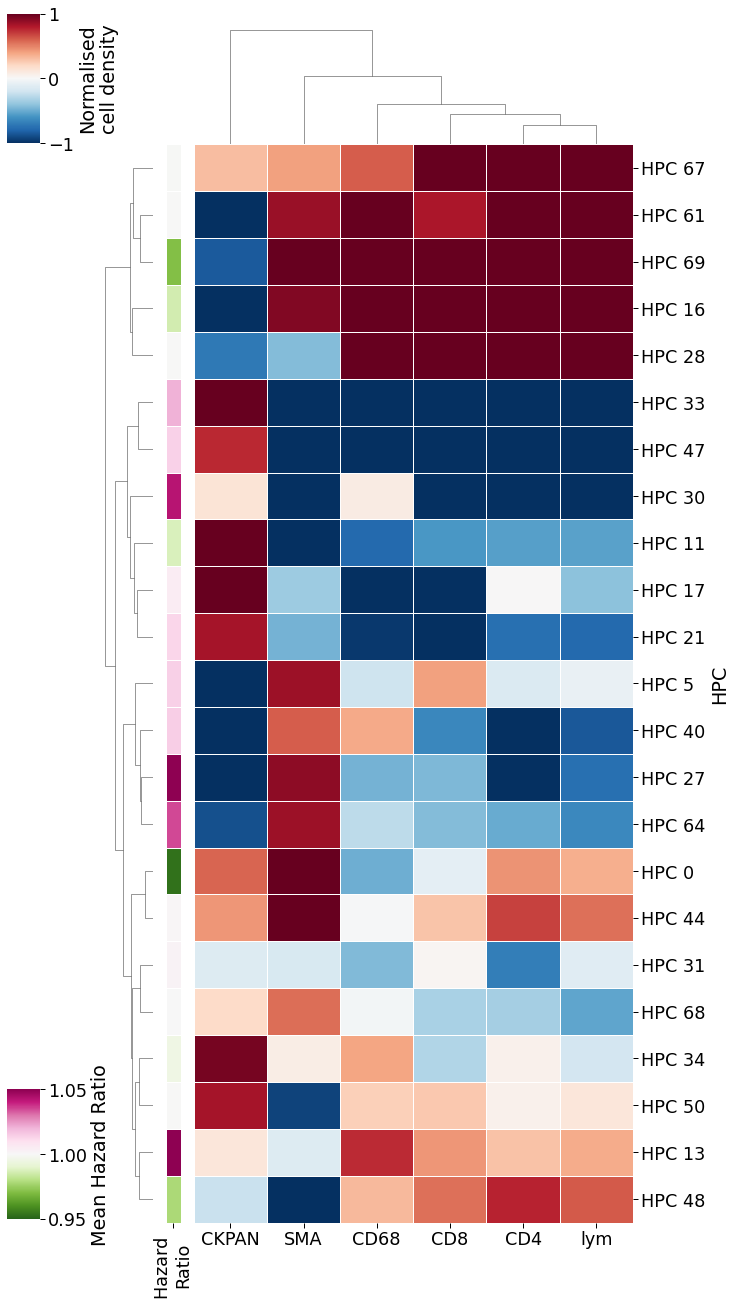

In [16]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, TwoSlopeNorm

survival_ridge_df_malignant = survival_ridge_df[survival_ridge_df.index.isin(malignant_avg_df.index)]
vmin, vmax = survival_ridge_df_malignant['exp(coef)'].min(), survival_ridge_df_malignant['exp(coef)'].max()

# norm = Normalize(vmin=vmin, vmax=vmax)
norm = TwoSlopeNorm(vmin=0.95, vmax=1.05, vcenter=1)

cmap = plt.cm.PiYG_r
sm = ScalarMappable(norm=norm, cmap=cmap)
row_colors = pd.DataFrame(sm.to_rgba(survival_ridge_df_malignant['exp(coef)']), index=malignant_avg_df.index, columns=['R', 'G', 'B', 'A'])
row_colors = row_colors.apply(lambda x: tuple(x), axis=1)
row_colors.name = 'Hazard \nRatio'

g = sns.clustermap(malignant_avg_df, 
                   z_score=1, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.1, .1), 
                   cbar_pos=(-0.13, 0.9, 0.05, 0.1), 
                   cbar_kws={'label':'Normalised\ncell density'},
                   row_colors=row_colors,
                   figsize=(9,18))

cbar_ax = g.fig.add_axes([-0.13, 0.07, 0.05, 0.1])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean Hazard Ratio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels());

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/heatmap_densities_all_clsuters_hazard_ratio.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

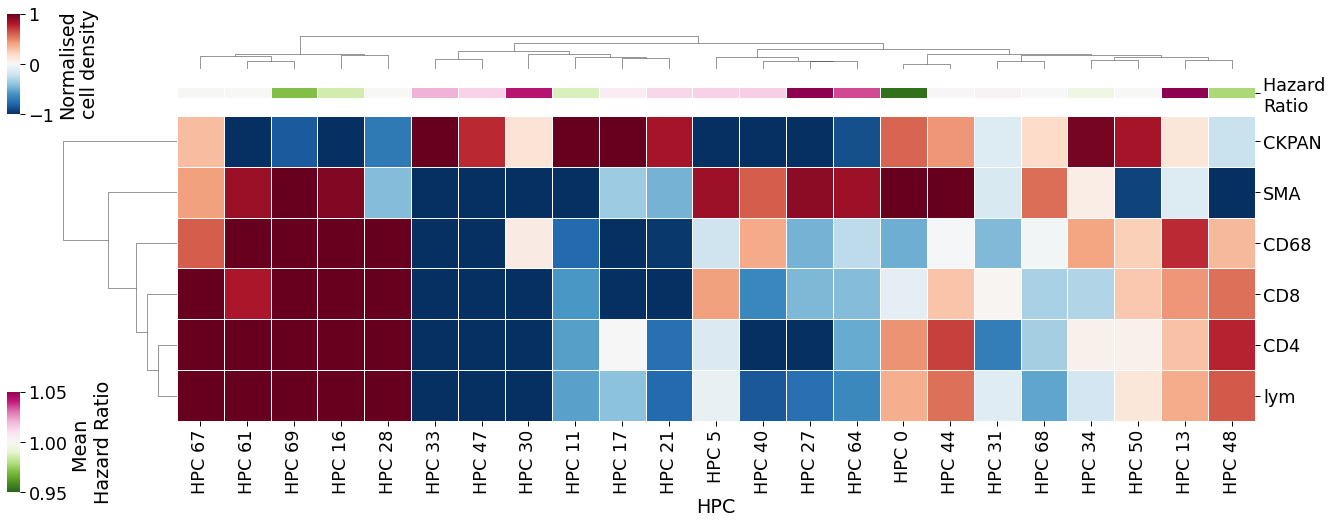

In [17]:
survival_ridge_df_malignant = survival_ridge_df_malignant.T
malignant_avg_df_t = malignant_avg_df.T

g = sns.clustermap(malignant_avg_df_t, 
                   z_score=0, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.1, .1), 
                   cbar_pos=(-0.03, 0.82, 0.01, 0.2), 
                   cbar_kws={'label':'Normalised\ncell density'},
                   col_colors=row_colors,
                   figsize=(18,7))

cbar_ax = g.fig.add_axes([-0.03, 0.07, 0.01, 0.2])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean \nHazard Ratio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), rotation=0);

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/heatmap_densities_malignant_clsuters_and_10_16_hazard_ratio_T.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

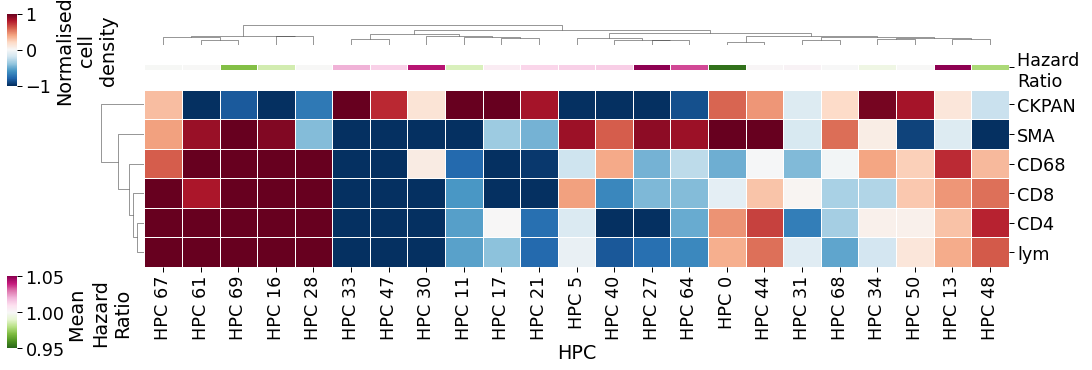

In [18]:
survival_ridge_df_malignant = survival_ridge_df_malignant.T
malignant_avg_df_t = malignant_avg_df.T

g = sns.clustermap(malignant_avg_df_t, 
                   z_score=0, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.05, .1), 
                   cbar_pos=(-0.08, 0.80, 0.01, 0.2), 
                   cbar_kws={'label':'Normalised\ncell\ndensity'},
                   col_colors=row_colors,
                   figsize=(14,5))

cbar_ax = g.fig.add_axes([-0.08, 0.07, 0.01, 0.2])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean \nHazard\nRatio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), rotation=0);

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/heatmap_densities_malignant_clsuters_and_10_16_hazard_ratio_T_dense.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Generate rankings for classification into superclusters

<Axes: xlabel='lym', ylabel='Density'>

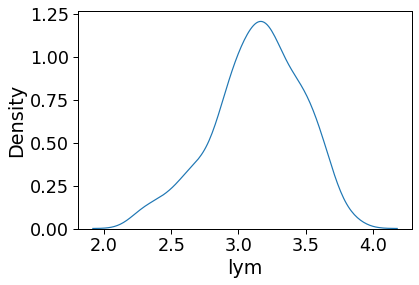

In [19]:
# Decide whether to use mean or median based on the distribution across the whole dataset
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(malignant_pure_cores_counts, x='lym', ax=ax)

In [20]:
# Right skew on KDE plot above means we should use the median

medians = list()
for cluster in malignant_pure_cores_counts['HPC'].unique():
    median = np.median(malignant_pure_cores_counts[malignant_pure_cores_counts['HPC'] == cluster]['lym'].values)
    medians.append((cluster, median))

order = pd.DataFrame(medians, columns=['HPC', 'median']).sort_values(by='median')['HPC'].to_list()[::-1]


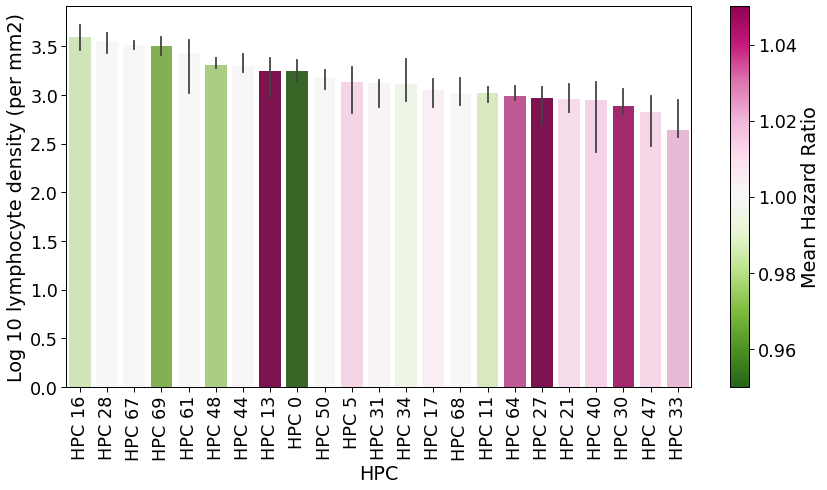

In [21]:
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(14,7))

sns.barplot(data=malignant_pure_cores_counts, x='HPC', y='lym', order=order, ax=ax, palette=dict(row_colors), estimator='median', errorbar='ci')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Log 10 lymphocyte density (per mm2)')
cbar = fig.colorbar(sm, orientation='vertical', ax=ax, aspect=20)
cbar.set_label('Mean Hazard Ratio')
# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/barplot_prop_cohesion_color_all_hazard_ratio.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [22]:
avg_z_score = cluster_avg_df.copy(deep=True)
avg_z_score = avg_z_score[avg_z_score.index.isin([f'HPC {c}' for c in list(malignant_clusters)+[10,16]])]
pop_med_lym = avg_z_score['lym'].median()

avg_z_score['lym_z'] = avg_z_score['lym'].apply(lambda x: 1 if x> pop_med_lym else 0)
avg_z_score.sort_values(by='lym')

,CKPAN,SMA,CD4,CD68,CD8,lym,lym_z
HPC,,,,,,,
HPC 33,3.634844,2.714557,2.574428,2.527903,2.190669,2.646765,0
HPC 47,3.489933,2.633176,2.650097,2.524245,2.299596,2.825514,0
HPC 30,3.378119,2.727039,2.685309,2.737602,2.307740,2.887261,0
HPC 40,3.056107,2.973997,2.714281,2.769660,2.435339,2.944880,0
HPC 21,3.503920,2.830604,2.785833,2.625204,2.252343,2.961775,0
HPC 27,3.120690,3.012635,2.625153,2.678300,2.490447,2.968499,0
HPC 64,3.195630,3.007047,2.849987,2.701054,2.494583,2.994808,0
HPC 11,3.537818,2.678664,2.837660,2.645275,2.453921,3.020685,0
HPC 68,3.388545,2.967466,2.890891,2.726008,2.525791,3.024932,0


<Axes: xlabel='robust_z_score', ylabel='Density'>

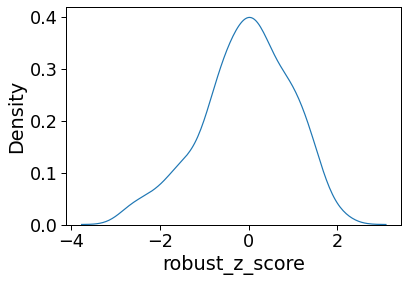

In [23]:
from scipy.stats import median_abs_deviation

lym_mean = malignant_pure_cores_counts['lym'].mean()
lym_med = malignant_pure_cores_counts['lym'].median()
lym_std = malignant_pure_cores_counts['lym'].std()
lym_mad = median_abs_deviation(malignant_pure_cores_counts['lym'], scale='normal')

def z_score(x, x_mean, x_std):
    return (x - x_mean) / x_std

def robust_z_score(x, x_median, x_mad):
    return (x - x_median) / x_mad

malignant_pure_cores_counts['robust_z_score'] = malignant_pure_cores_counts['lym'].apply(lambda x: robust_z_score(x, lym_med, lym_mad))

fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(malignant_pure_cores_counts, x='robust_z_score', ax=ax)

In [ ]:
z_mean_lym = malignant_pure_cores_counts.groupby('HPC').agg('median').reset_index().sort_values(by='robust_z_score', ascending=False)
z_lym_order = list(z_mean_lym['HPC'])

In [25]:
median_lym = malignant_pure_cores_counts.groupby('HPC').agg('median').reset_index().sort_values(by='lym')
median_lym['median'] = median_lym['lym'].apply(lambda x: 1 if x > np.median(malignant_pure_cores_counts['lym']) else 0)

median_lym

,HPC,CKPAN,SMA,Negative,CD4,CD68,CD8,lym,robust_z_score,median
10,HPC 33,3.634844,2.714557,1578.908700,2.574428,2.527903,2.190669,2.646765,-1.548294,0
14,HPC 47,3.489933,2.633176,626.535232,2.650097,2.524245,2.299596,2.825514,-1.007368,0
8,HPC 30,3.378119,2.727039,957.674492,2.685309,2.737602,2.307740,2.887261,-0.820510,0
12,HPC 40,3.056107,2.973997,1533.911180,2.714281,2.769660,2.435339,2.944880,-0.646145,0
5,HPC 21,3.503920,2.830604,1566.409993,2.785833,2.625204,2.252343,2.961775,-0.595019,0
6,HPC 27,3.120690,3.012635,1607.224329,2.625153,2.678300,2.490447,2.968499,-0.574672,0
19,HPC 64,3.195630,3.007047,1581.194231,2.849987,2.701054,2.494583,2.994808,-0.495054,0
1,HPC 11,3.537818,2.678664,1141.304331,2.837660,2.645275,2.453921,3.020685,-0.416745,0
21,HPC 68,3.388545,2.967466,1116.093207,2.890891,2.726008,2.525791,3.024932,-0.403894,0
4,HPC 17,3.686496,2.845440,1037.222203,2.978421,2.584696,2.314590,3.053223,-0.318280,0


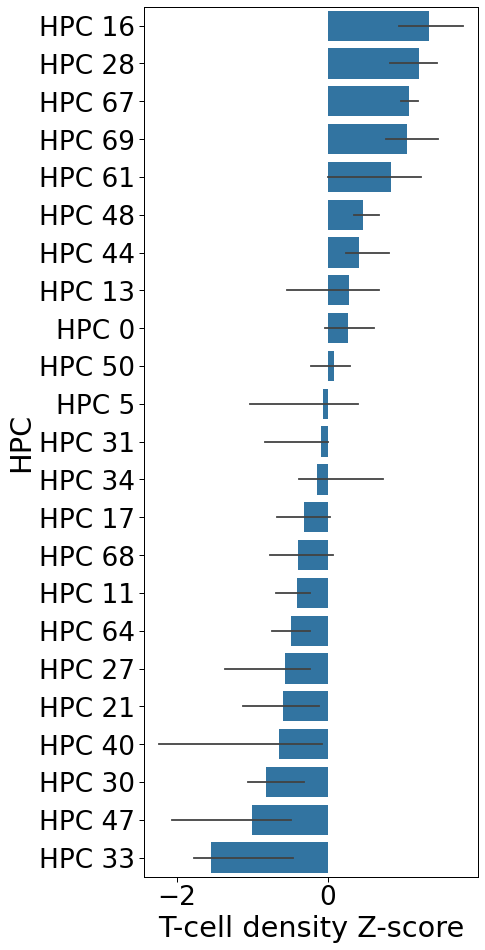

In [26]:
sns.set_context("paper", font_scale=3.0)
fig, ax = plt.subplots(figsize=(6,16))

sns.barplot(data=malignant_pure_cores_counts, y='HPC', x='robust_z_score', estimator='median', order=median_lym['HPC'][::-1], errorbar='ci', ax=ax, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('T-cell density Z-score')
plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/250328_barplot_robust_z_score_lym_density_color_all_hazard_ratio_horizontal_filtered_HPCs.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [ ]:
malignant_pure_cores_counts.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/cell_log10_density_per_core.csv')

In [ ]:
median_lym.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/median_log10_density_per_cluster.csv')

### Add the superclsuters to the density heatmap

In [29]:
row_colors

HPC
HPC 0     (0.19384851980007692, 0.44167627835447903, 0.1...
HPC 11    (0.8524413687043446, 0.9392541330257594, 0.736...
HPC 13    (0.5568627450980392, 0.00392156862745098, 0.32...
HPC 16    (0.8241445597846984, 0.9269511726259132, 0.690...
HPC 17    (0.980161476355248, 0.9244136870434448, 0.9532...
HPC 21    (0.9810841983852364, 0.839677047289504, 0.9178...
HPC 27    (0.5568627450980392, 0.00392156862745098, 0.32...
HPC 28    (0.9673202614379085, 0.968473663975394, 0.9656...
HPC 30    (0.7175701653210305, 0.07989234909650135, 0.44...
HPC 31    (0.9737024221453288, 0.9491733948481353, 0.961...
HPC 33    (0.9407151095732411, 0.6991926182237603, 0.844...
HPC 34    (0.9359477124183007, 0.9647827758554403, 0.893...
HPC 40    (0.9718569780853519, 0.8073817762399079, 0.901...
HPC 44    (0.9709342560553633, 0.9597846981930027, 0.965...
HPC 47    (0.9755478662053056, 0.8202998846597462, 0.908...
HPC 48    (0.6733564013840831, 0.8510572856593619, 0.467...
HPC 5     (0.9737024221453288, 0.813

In [30]:
cluster_annotations = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/bioclavis_pure_superclusters.csv', index_col=0)
cluster_annotations = cluster_annotations.drop(labels='core_ID', axis=1).dropna().drop_duplicates().sort_values(by='cluster').set_index('cluster')
cluster_annotations = cluster_annotations.replace({'hot_cohesive':'Hot cohesive',
                                                   'cold_cohesive':'Cold cohesive',
                                                   'cold_discohesive':'Cold discohesive',
                                                   'hot_discohesive':'Hot discohesive'})
cluster_annotations = cluster_annotations.rename(columns={'supercluster':'Supercluster'})
cluster_annotations = cluster_annotations[cluster_annotations.index != 'HPC 10'] 
cluster_annotations

,Supercluster
cluster,
HPC 0,Hot cohesive
HPC 11,Cold cohesive
HPC 13,Hot discohesive
HPC 16,Hot discohesive
HPC 17,Cold cohesive
HPC 21,Cold cohesive
HPC 27,Cold discohesive
HPC 28,Hot discohesive
HPC 30,Cold discohesive


In [ ]:
color_palette = sns.husl_palette(len(cluster_annotations['Supercluster'].unique()))
palette_dict = dict(zip(cluster_annotations['Supercluster'].unique(), color_palette))
row_colors = cluster_annotations['Supercluster'].astype(str).map(palette_dict)

In [32]:
survival_ridge_df_malignant = survival_ridge_df[survival_ridge_df.index.isin(row_colors.index)]
vmin, vmax = survival_ridge_df_malignant['exp(coef)'].min(), survival_ridge_df_malignant['exp(coef)'].max()

# norm = Normalize(vmin=vmin, vmax=vmax)
norm = TwoSlopeNorm(vmin=0.95, vmax=1.05, vcenter=1)

cmap = plt.cm.PiYG_r
sm = ScalarMappable(norm=norm, cmap=cmap)
row_colors_s = pd.DataFrame(sm.to_rgba(survival_ridge_df_malignant['exp(coef)']), index=row_colors.index, columns=['R', 'G', 'B', 'A'])
row_colors_s = row_colors_s.apply(lambda x: tuple(x), axis=1)
row_colors_s.name = 'Hazard \nRatio'

In [33]:
row_colors_df = pd.DataFrame({'Supercluster':row_colors,
                              'Hazard Ratio':row_colors_s})

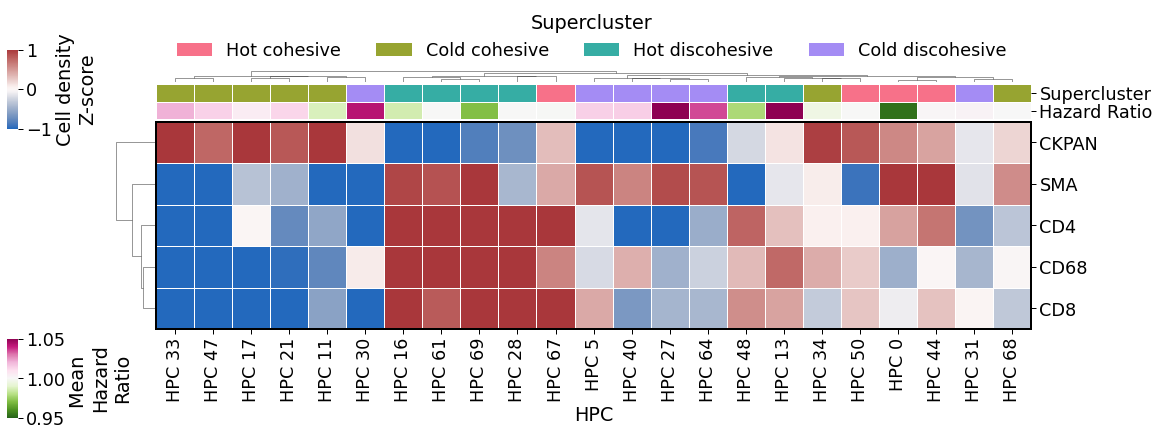

In [35]:
from matplotlib.patches import Rectangle

sns.set_context("paper", font_scale=2.0)

survival_ridge_df_malignant = survival_ridge_df_malignant.T
malignant_avg_df_t = malignant_avg_df.T
malignant_avg_df_t = malignant_avg_df_t.drop(labels='lym', axis=0)

g = sns.clustermap(malignant_avg_df_t[[col for col in malignant_avg_df_t.columns if col in row_colors.index]], 
                   z_score=0, 
                   cmap='vlag', 
                   vmin=-1, vmax=1,
                   linewidth=.6,
                   dendrogram_ratio=(.045, .045), 
                   colors_ratio=(0.05,0.07),
                   cbar_pos=(-0.08, 0.80, 0.01, 0.2), 
                   cbar_kws={'label':'Cell density\nZ-score'},
                   col_colors=row_colors_df,
                   figsize=(15,5.5))

cbar_ax = g.fig.add_axes([-0.08, 0.07, 0.01, 0.2])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Mean \nHazard\nRatio')
g.row_color_labels = 'Mean Hazard Ratio'
cbar.outline.set_visible(False)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), rotation=0);

legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in palette_dict.items()]
plt.legend(handles=legend_elements_1, title='Supercluster', ncols=4, bbox_to_anchor=[94, 5.3], frameon=False)

g.ax_heatmap.collections[0].set_edgecolor('white')
# g.ax_heatmap.collections[0].set_linewidth(.1)

n_rows, n_cols = malignant_avg_df_t[[col for col in malignant_avg_df_t.columns if col in row_colors.index]].shape

rect = Rectangle(
    xy=(0, 0),  # Lower left corner
    width=n_cols,
    height=n_rows,
    fill=False,
    edgecolor='black',
    linewidth=2,
    clip_on=False
)
g.ax_heatmap.add_patch(rect)
# g.ax_heatmap.set_xlabel('Leiden cluster')
# g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0);

plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/plots/heatmap_densities_malignant_clusters_and_16_hazard_ratio_T_dense_superclusters.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Scatterplot of the four superclusters

In [120]:
noise = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/median_noise_per_cluster.csv', index_col=0)
lym_density = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/median_log10_density_per_cluster.csv', index_col=0)

In [123]:
lym_density

,HPC,CKPAN,SMA,Negative,CD4,CD68,CD8,lym,robust_z_score,median
10,HPC 33,3.634844,2.714557,1578.908700,2.574428,2.527903,2.190669,2.646765,-1.548294,0
14,HPC 47,3.489933,2.633176,626.535232,2.650097,2.524245,2.299596,2.825514,-1.007368,0
8,HPC 30,3.378119,2.727039,957.674492,2.685309,2.737602,2.307740,2.887261,-0.820510,0
12,HPC 40,3.056107,2.973997,1533.911180,2.714281,2.769660,2.435339,2.944880,-0.646145,0
5,HPC 21,3.503920,2.830604,1566.409993,2.785833,2.625204,2.252343,2.961775,-0.595019,0
6,HPC 27,3.120690,3.012635,1607.224329,2.625153,2.678300,2.490447,2.968499,-0.574672,0
19,HPC 64,3.195630,3.007047,1581.194231,2.849987,2.701054,2.494583,2.994808,-0.495054,0
1,HPC 11,3.537818,2.678664,1141.304331,2.837660,2.645275,2.453921,3.020685,-0.416745,0
21,HPC 68,3.388545,2.967466,1116.093207,2.890891,2.726008,2.525791,3.024932,-0.403894,0
4,HPC 17,3.686496,2.845440,1037.222203,2.978421,2.584696,2.314590,3.053223,-0.318280,0


In [124]:
annot_stats = cluster_annotations.merge(noise, left_on='cluster', right_on='HPC')
annot_stats = annot_stats.merge(lym_density, on='HPC')
annot_stats

,Supercluster,HPC,noise,robust_z_score_x,median_x,CKPAN,SMA,Negative,CD4,CD68,CD8,lym,robust_z_score_y,median_y
0,Hot cohesive,HPC 0,0.030344,-0.398536,0,3.458759,3.042304,1208.949339,3.092664,2.676937,2.587051,3.247579,0.269873,1
1,Cold cohesive,HPC 11,0.025816,-0.489230,0,3.537818,2.678664,1141.304331,2.837660,2.645275,2.453921,3.020685,-0.416745,0
2,Hot discohesive,HPC 13,0.088962,0.775638,1,3.376048,2.875556,1080.732825,3.052229,2.809495,2.732999,3.250600,0.279017,1
3,Hot discohesive,HPC 16,0.215348,3.307301,1,3.119559,3.016854,2125.246560,3.271159,2.916385,3.294004,3.602642,1.344358,1
4,Cold cohesive,HPC 17,0.008196,-0.842181,0,3.686496,2.845440,1037.222203,2.978421,2.584696,2.314590,3.053223,-0.318280,0
5,Cold cohesive,HPC 21,0.024876,-0.508074,0,3.503920,2.830604,1566.409993,2.785833,2.625204,2.252343,2.961775,-0.595019,0
6,Cold discohesive,HPC 27,0.154209,2.082626,1,3.120690,3.012635,1607.224329,2.625153,2.678300,2.490447,2.968499,-0.574672,0
7,Hot discohesive,HPC 28,0.085580,0.707910,1,3.224591,2.836164,2142.051194,3.403758,2.911226,3.056120,3.558568,1.210980,1
8,Cold discohesive,HPC 30,0.080967,0.615499,1,3.378119,2.727039,957.674492,2.685309,2.737602,2.307740,2.887261,-0.820510,0
9,Cold discohesive,HPC 31,0.068879,0.373365,1,3.329674,2.872341,1604.931778,2.801328,2.681267,2.618584,3.127121,-0.094653,0


In [170]:
annot_stats.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/merged_cluster_lym_log10_density_and_noise.csv')

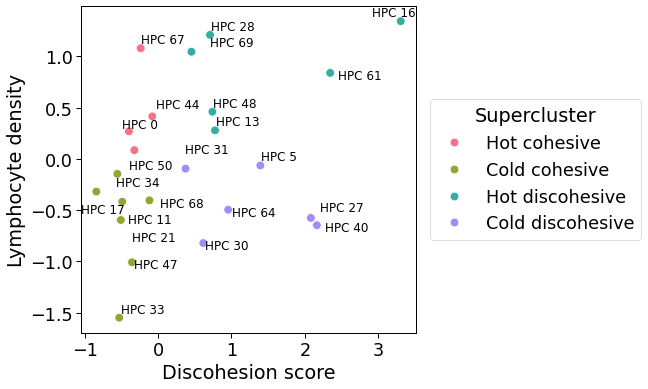

In [177]:
from adjustText import adjust_text
from scipy import interpolate

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(annot_stats, x='robust_z_score_x', y = 'robust_z_score_y', hue='Supercluster', 
                palette={'Hot cohesive':(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
                         'Hot discohesive':(0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
                         'Cold cohesive':(0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
                         'Cold discohesive':(0.6423044349219739, 0.5497680051256467, 0.9582651433656727)}, 
                s=75, ax=ax)
# ax.set_ylim([-1.7,1.5])
# ax.set_xlim([-1,1.6])
ax.set_xlabel('Discohesion score')
ax.set_ylabel('Lymphocyte density')

f = interpolate.interp1d(annot_stats['robust_z_score_x'], annot_stats['robust_z_score_y'])
x = np.linspace(min(annot_stats['robust_z_score_x']), max(annot_stats['robust_z_score_x']), 200)
y = f(x)

texts = []
for i, row in annot_stats.iterrows():
    texts.append(ax.text(row['robust_z_score_x'], row['robust_z_score_y'], row['HPC'], fontsize=12))

# Adjust text to avoid overlapping
adjust_text(texts, x = x, y = y, min_arrow_len=0.1, ax=ax)

# plt.show()

sns.move_legend(ax, loc='right', bbox_to_anchor=(1.7, 0.5))

### Ki67 by cluster

In [36]:
avg_ki67_by_cluster = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/TMAs/assign_bioclavis_to_clusters_post_rotation/avg_ki67_by_cluster.csv', index_col=0)
avg_ki67_by_cluster

,ki67_index_tumour,ki67_index_stroma
HPC 0,0.046857,0.006905
HPC 10,0.409500,0.052500
HPC 11,0.142378,0.024000
HPC 13,0.454143,0.080714
HPC 16,0.305167,0.054500
HPC 17,0.390864,0.083864
HPC 21,0.279933,0.015267
HPC 27,0.237857,0.012143
HPC 28,0.339273,0.042000
HPC 30,0.230333,0.028778


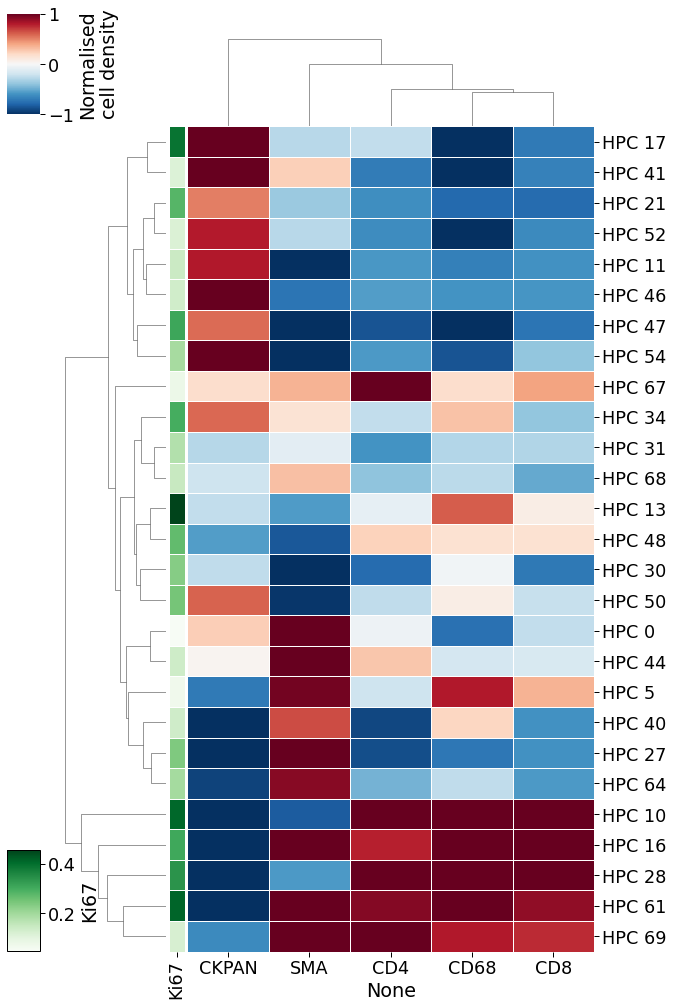

In [37]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

vmin, vmax = avg_ki67_by_cluster['ki67_index_tumour'].min(), avg_ki67_by_cluster['ki67_index_tumour'].max()

norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
sm = ScalarMappable(norm=norm, cmap=cmap)
row_colors = pd.DataFrame(sm.to_rgba(avg_ki67_by_cluster['ki67_index_tumour']), index=cluster_avg_df.index, columns=['R', 'G', 'B', 'A'])
row_colors = row_colors.apply(lambda x: tuple(x), axis=1)
row_colors.name = 'Ki67'

g = sns.clustermap(cluster_avg_df, 
                   z_score=1, 
                   cmap='RdBu_r', 
                   vmin=-1, vmax=1,
                   linewidth=.5,
                   dendrogram_ratio=(.2, .1), 
                   cbar_pos=(-0.05, 0.9, 0.05, 0.1), 
                   cbar_kws={'label':'Normalised\ncell density'},
                   row_colors=row_colors,
                   figsize=(9,14))

cbar_ax = g.fig.add_axes([-0.05, 0.07, 0.05, 0.1])  # [left, bottom, width, height]
# cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation="vertical", pad=0.2)
cbar = g.fig.colorbar(sm, cax=cbar_ax, orientation="vertical", pad=0.2)
cbar.set_label('Ki67')
g.row_color_labels = 'Ki67'